## Data Wrangling WeRateDogs Project

In [287]:
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import re
from tweepy import OAuthHandler

### Data Gathering

In [288]:
#loading WeRateDogs twitter archive that was obtained as a csv file into dataframe
df_tw_archive =pd.read_csv('twitter-archive-enhanced.csv')


In [289]:
# progrmaticly downloading and saving image-predictions.tsv data using requests
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
open('image_predictions.tsv', 'wb').write(requests.get(url).content)

335079

In [290]:
#loading downloaded image-predictions.tsv file into dataframe
df_image_predictions = pd.read_csv('image_predictions.tsv',sep='\t')

In [291]:
# setting api's key, secrets, and token 
con_key = 'HIDDEN'
con_secret = 'HIDDEN'
acc_token = 'HIDDEN'
acc_secret = 'HIDDEN'
#getting tweets ids
tweet_ids = df_tw_archive.tweet_id.values

auth = OAuthHandler(con_key, con_secret)
auth.set_access_token(acc_token, acc_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [292]:
#append JSON object returnd from quering the api to both tweet_json.txt and tweets_data list
tweets_data = []
with open('tweet-json.txt', 'w') as outfile:
    for tweet_id in tweet_ids:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(tweet._json, outfile)
            tweets_data.append({'tweet_id': tweet['id'],
                                'retweet_count': tweet['retweet_count'],
                                'favorite_count': tweet['favorite_count']
                               })
            outfile.write('\n')
        except:
            continue
load list tweets_data of data captured from JSON object eturnd from quering the api into dataframe 


df_tweets = pd.DataFrame(tweets_data)


### Data Assessment 

In [293]:
# viewing twitter archive data loaded into df_tw_archive
df_tw_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [294]:
#exploring df_tw_archive's data types and missing data
df_tw_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [295]:
# viewing image predictions data loaded into df_image_predictions
df_image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [296]:
#exploring df_image_predictions's data types and missing data
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [297]:
# viewing image predictions data loaded into df_tweets
df_tweets.head()

,favorite_count,retweet_count,tweet_id
0,39467,8853,892420643555336193
1,33819,6514,892177421306343426
2,25461,4328,891815181378084864
3,42908,8964,891689557279858688
4,41048,9774,891327558926688256


In [298]:
#exploring df_tweets's data types and missing data
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
tweet_id          2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [299]:
#to display whole text in dataframe columns
pd.set_option('display.max_colwidth', -1)

In [300]:
# count of retweets   
df_tw_archive.retweeted_status_id.notnull().sum()

181

In [301]:
# count of replies
df_tw_archive.in_reply_to_status_id .notnull().sum()

78

In [302]:
# view value in name column
df_tw_archive.name.value_counts()

None            745
a               55 
Charlie         12 
Lucy            11 
Oliver          11 
Cooper          11 
Lola            10 
Penny           10 
Tucker          10 
Winston         9  
Bo              9  
the             8  
Sadie           8  
Toby            7  
an              7  
Buddy           7  
Daisy           7  
Bailey          7  
Koda            6  
Rusty           6  
Dave            6  
Milo            6  
Jack            6  
Bella           6  
Jax             6  
Oscar           6  
Stanley         6  
Scout           6  
Leo             6  
Louis           5  
               ..  
Pherb           1  
Tobi            1  
Ester           1  
Jarvis          1  
Christoper      1  
Willow          1  
Oreo            1  
Kingsley        1  
Sobe            1  
Acro            1  
Beckham         1  
Chevy           1  
Genevieve       1  
Samsom          1  
Cleopatricia    1  
Tuck            1  
Vinnie          1  
Blanket         1  
Major           1  


In [303]:
# count of rows where the name value is incorrect ('None' or lower letter such as 'a', 'an', 'the', 'such' etc.) and the tweet text contains 'name is xxx' or 'named xxx'
df_tw_archive[((df_tw_archive['name'].str.islower() | (df_tw_archive['name'] == 'None') ) & (df_tw_archive['text'].str.contains('name is|named'))) ]['name'].count()


32

In [304]:
# view rows where the name value is incorrect (None or lower letter such as 'a', 'an', 'the', 'such' etc.) and the tweet text contains 'name is xxx' or 'named xxx'
df_tw_archive[((df_tw_archive['name'].str.islower())|  (df_tw_archive['name'] == 'None'  )) & (df_tw_archive['text'].str.contains('name is|named')) ]


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
35,885518971528720385,NaN,NaN,2017-07-13 15:19:09 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I have a new hero and his name is Howard. 14/10 https://t.co/gzLHboL7Sk,NaN,NaN,NaN,https://twitter.com/4bonds2carbon/status/885517367337512960,14,10,None,None,None,None,None
168,859607811541651456,NaN,NaN,2017-05-03 03:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Sorry for the lack of posts today. I came home from school and had to spend quality time with my puppo. Her name is Zoey and she's 13/10 https://t.co/BArWupFAn0,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859607811541651456/photo/1,13,10,None,None,None,None,puppo
603,798628517273620480,NaN,NaN,2016-11-15 20:47:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This a Norwegian Pewterschmidt named Tickles. Ears for days. 12/10 I care deeply for Tickles https://t.co/0aDF62KVP7,6.675094e+17,4.196984e+09,2015-11-20 01:06:48 +0000,"https://twitter.com/dog_rates/status/667509364010450944/photo/1,https://twitter.com/dog_rates/status/667509364010450944/photo/1",12,10,None,None,None,None,None
843,766714921925144576,7.667118e+17,4.196984e+09,2016-08-19 19:14:16 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",His name is Charley and he already has a new set of wheels thanks to donations. I heard his top speed was also increased. 13/10 for Charley,NaN,NaN,NaN,NaN,13,10,None,None,None,None,None
852,765395769549590528,NaN,NaN,2016-08-16 03:52:26 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is my dog. Her name is Zoey. She knows I've been rating other dogs. She's not happy. 13/10 no bias at all https://t.co/ep1NkYoiwB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/765395769549590528/photo/1,13,10,my,None,None,None,None
1678,682047327939461121,NaN,NaN,2015-12-30 03:55:29 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",We normally don't rate bears but this one seems nice. Her name is Thea. Appears rather fluffy. 10/10 good bear https://t.co/fZc7MixeeT,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682047327939461121/photo/1,10,10,None,None,None,None,None
1734,679736210798047232,NaN,NaN,2015-12-23 18:51:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This pup's name is Sabertooth (parents must be cool). Ears for days. Jumps unannounced. 9/10 would pet diligently https://t.co/iazoiNUviP,NaN,NaN,NaN,https://twitter.com/dog_rates/status/679736210798047232/photo/1,9,10,None,None,None,None,None
1853,675706639471788032,NaN,NaN,2015-12-12 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a Sizzlin Menorah spaniel from Brooklyn named Wylie. Lovable eyes. Chiller as hell. 10/10 and I'm out.. poof https://t.co/7E0AiJXPmI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675706639471788032/photo/1,10,10,a,None,None,None,None
1955,673636718965334016,NaN,NaN,2015-12-06 22:54:44 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a Lofted Aphrodisiac Terrier named Kip. Big fan of bed n breakfasts. Fits perfectly. 10/10 would pet firmly https://t.co/gKlLpNzIl3,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673636718965334016/photo/1,10,10,a,None,None,None,None
2034,671743150407421952,NaN,NaN,2015-12-01 17:30:22 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a Tuscaloosa Alcatraz named Jacob (Yacōb). Loves to sit in swing. Stellar tongue. 11/10 loo

In [305]:
# check values of rating_denominator where denominator != 10
df_tw_archive[df_tw_archive['rating_denominator'] != 10]['rating_denominator'].value_counts()

50     3
11     3
20     2
80     2
90     1
40     1
130    1
2      1
70     1
7      1
110    1
170    1
120    1
15     1
16     1
150    1
0      1
Name: rating_denominator, dtype: int64

In [306]:
# check rating_denominator where denominator != 10
df_tw_archive[df_tw_archive['rating_denominator'] != 10][['tweet_id','in_reply_to_status_id','retweeted_status_id','text','rating_denominator']]

,tweet_id,in_reply_to_status_id,retweeted_status_id,text,rating_denominator
313,835246439529840640,8.352460e+17,NaN,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",0
342,832088576586297345,8.320875e+17,NaN,@docmisterio account started on 11/15/15,15
433,820690176645140481,NaN,NaN,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,70
516,810984652412424192,NaN,NaN,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,7
784,775096608509886464,NaN,7.403732e+17,"RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",11
902,758467244762497024,NaN,NaN,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,150
1068,740373189193256964,NaN,NaN,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",11
1120,731156023742988288,NaN,NaN,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,170
1165,722974582966214656,NaN,NaN,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,20
1202,716439118184652801,NaN,NaN,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50


In [307]:
#image that was predicted as not dogs
df_image_predictions[df_image_predictions['p1_dog'] == False][['tweet_id','p1_dog', 'p1', 'p1_conf']]


,tweet_id,p1_dog,p1,p1_conf
6,666051853826850816,False,box_turtle,0.933012
8,666057090499244032,False,shopping_cart,0.962465
17,666104133288665088,False,hen,0.965932
18,666268910803644416,False,desktop_computer,0.086502
21,666293911632134144,False,three-toed_sloth,0.914671
22,666337882303524864,False,ox,0.416669
25,666362758909284353,False,guinea_pig,0.996496
29,666411507551481857,False,coho,0.404640
33,666430724426358785,False,llama,0.505184
43,666776908487630848,False,seat_belt,0.375057


In [308]:
#tweets that cointin don't send, dont send, Dont send or Don't send'
df_tw_archive[( df_tw_archive['text'].str.contains('don\'t send|dont send|Dont send|Don\'t send'))][['tweet_id','text']]


,tweet_id,text
59,880872448815771648,Ugh not again. We only rate dogs. Please don't send in well-dressed floppy-tongued street penguins. Dogs only please. Thank you... 12/10 https://t.co/WiAMbTkDPf
62,880095782870896641,Please don't send in photos without dogs in them. We're not @porch_rates. Insubordinate and churlish. Pretty good porch tho 11/10 https://t.co/HauE8M3Bu4
127,867900495410671616,"Unbelievable. We only rate dogs. Please don't send in non-canines like the ""I"" from Pixar's opening credits. Thank you... 12/10 https://t.co/JMhDNv5wXZ"
141,864873206498414592,We only rate dogs. Please don't send in Jesus. We're trying to remain professional and legitimate. Thank you... 14/10 https://t.co/wr3xsjeCIR
154,862096992088072192,We only rate dogs. Please don't send perfectly toasted marshmallows attempting to drive. Thank you... 13/10 https://t.co/nvZyyrp0kd
314,835172783151792128,We only rate dogs. Please don't send in any non-canines like this Floppy Tongued House Panda. Thank you... 12/10 would still pet https://t.co/8fX2VkExnL
390,826240494070030336,We only rate dogs. Please don't send in any more non-dogs like this Wild Albanian Street Moose. Thank you... 11/10 https://t.co/srXL2s868C
411,823269594223824897,RT @dog_rates: We only rate dogs. Please don't send pics of men capturing low level clouds. Thank you... 11/10 https://t.co/rLi83ZyCL5
419,822244816520155136,We only rate dogs. Please don't send pics of men capturing low level clouds. Thank you... 11/10 https://t.co/rLi83ZyCL5
494,813187593374461952,We only rate dogs. Please don't send in other things like this very good Christmas tree. Thank you... 13/10 https://t.co/rvSANEsQZJ


In [309]:
#tweets that has  '&amp;' in text instead of '&'
df_tw_archive[(df_tw_archive['text'].str.contains('&amp;'))]


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
262,842765311967449089,NaN,NaN,2017-03-17 15:51:22 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Indie. She's not a fan of baths but she's definitely a fan of hide &amp; seek. 12/10 click the link to help Indie\n\nhttps://t.co/fvGkIuAlFK https://t.co/kiCFtmJd7l,NaN,NaN,NaN,"https://www.gofundme.com/get-indie-home/,https://twitter.com/dog_rates/status/842765311967449089/photo/1,https://twitter.com/dog_rates/status/842765311967449089/photo/1",12,10,Indie,None,None,None,None
273,840728873075638272,NaN,NaN,2017-03-12 00:59:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Pipsy. He is a fluffball. Enjoys traveling the sea &amp; getting tangled in leash. 12/10 I would kill for Pipsy https://…,6.671522e+17,4.196984e+09,2015-11-19 01:27:25 +0000,https://twitter.com/dog_rates/status/667152164079423490/photo/1,12,10,Pipsy,None,None,None,None
320,834458053273591808,NaN,NaN,2017-02-22 17:41:18 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Meet Chester (bottom) &amp; Harold (top). They are different dogs not only in appearance, but in personality as well. Both 12/10 symbiotic af https://t.co/8ZOZS2FSJe",NaN,NaN,NaN,https://twitter.com/dog_rates/status/834458053273591808/photo/1,12,10,Chester,None,None,None,None
461,817536400337801217,NaN,NaN,2017-01-07 01:00:41 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Say hello to Eugene &amp; Patti Melt. No matter how dysfunctional they get, they will never top their owners. Both 12/10 would pet at same time https://t.co/jQUdvtdYMu",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/817536400337801217/photo/1,https://twitter.com/dog_rates/status/817536400337801217/photo/1,https://twitter.com/dog_rates/status/817536400337801217/photo/1,https://twitter.com/dog_rates/status/817536400337801217/photo/1",12,10,Eugene,None,None,None,None
485,814578408554463233,NaN,NaN,2016-12-29 21:06:41 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Meet Beau &amp; Wilbur. Wilbur stole Beau's bed from him. Wilbur now has so much room for activities. 9/10 for both pups https:/…,6.981954e+17,4.196984e+09,2016-02-12 17:22:12 +0000,https://twitter.com/dog_rates/status/698195409219559425/photo/1,9,10,Beau,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,None,None,None,None
799,772826264096874500,NaN,NaN,2016-09-05 15:58:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Roosevelt. He's preparing for takeoff. Make sure tray tables are in their full pupright &amp; licked position\n11/10 https://t.co/7CQkn3gHOQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/772826264096874500/photo/1,11,10,Roosevelt,None,None,None,None
889,759793422261743616,NaN,NaN,2016-07-31 16:50:42 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/759793422261743616/photo/1,https://twitter.com/dog_rates/status/759793422261743616/photo/1",12,10,Maggie,doggo,None,

In [311]:
# tweets that contains tweets in the pattern of  (#.##/##)
df_tw_archive[df_tw_archive.text.str.contains('(\d)+\.(\d)+/(\d)+')]


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",5,10,Bella,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034220126208/photo/1,27,10,Sophie,None,None,pupper,None
1689,681340665377193984,6.813394e+17,4.196984e+09,2015-12-28 05:07:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,NaN,NaN,NaN,NaN,5,10,None,None,None,None,None
1712,680494726643068929,NaN,NaN,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680494726643068929/photo/1,26,10,None,None,None,None,None


#### Quality Issues:
- Nulls represented as 'None' in columns 'name', 'doggo', 'floofer', 'pupper','puppo'
- Replace name incorrect names such as 'a', 'an', and 'the' etc. also missing names with correct name (extracted from tweet text) or NaN value if value not available
- Tweets text has value encoding issues '&' instead of '&'
- Only want original ratings so I'll drop any reply and retweets
- Source column values are not clear need to formatted
- Timestamp column contains extra "+0000"
- drop rows where text has 'don't send' as they are not ratings of dogs 
- Data type are not appropriate and needs to be changed such as timestamp
- Incorrect rating denominator values taken form wrong #/# pattern (fix related rating_numerator value alongside of it)
- Incorrect rating denominator values in the float format of #.##/# (only value after decimal point were captured)
- Drop record from df_image_predictions where p1_dog if false (I'm only considering the first prediction as it is the one with highest confidence)
- Rename columns to be more appropriate, for example:
	  - "timestamp" : "tweet_timestamp"
	  - "text" : "tweet_text"
	  - "rating_numerator" : "rating_out_of_denominator"
      - "name" : "dog_name"
      - "p1" : "dog_breed_prediction"
      - "p1_conf" : "prediction_confidence"



#### Tidiness Issues:
- Data are scattered in 3 dataframes data need to be combined into one dataframe has the data we need
- Data in the four dog stages columns 'doggo', 'floofer', 'pupper' and 'puppo' need to be combined into one category column 'dog_stage'
- The columns 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'in_reply_to_status_id' and 'in_reply_to_user_id' of df_tw_archive will not be useful after I drop any reply and retweets. Also drop 'doggo', 'floofer', 'pupper' and 'puppo' columns
- As I'm are only considering the first prediction as it is the one with highest confidence. So I'll drop 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', and 'p3_dog' columns form df_image_predictions.



### Data Cleaning 

In [312]:
# Creat a copy of the gathered 3 datasets for reference
df_tw_archive_clean  = df_tw_archive.copy()
df_image_predictions_clean = df_image_predictions.copy()
df_tweets_clean = df_tweets.copy()

-------
#### Issue:
     Data are scattered in 3 dataframes data need to be combined into one dataframe has the data we need
##### Define:
    Join the dataframe in one dataframe based on tweet id  
##### Code:

In [313]:
#merge df_tw_archive_clean and df_image_predictions_clean on 'tweet_id'
df_tweets_master_clean =  pd.merge(df_tw_archive_clean,df_image_predictions_clean,on='tweet_id')
df_tweets_master_clean.shape

(2075, 28)

In [314]:
#merge df_tweets_master_clean and df_tweets_clean on 'tweet_id'
df_tweets_master_clean =  pd.merge(df_tweets_master_clean,df_tweets_clean,on='tweet_id')
df_tweets_master_clean.shape

(2073, 30)

#### Test

In [315]:

df_tweets_master_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 30 columns):
tweet_id                      2073 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2073 non-null object
source                        2073 non-null object
text                          2073 non-null object
retweeted_status_id           79 non-null float64
retweeted_status_user_id      79 non-null float64
retweeted_status_timestamp    79 non-null object
expanded_urls                 2073 non-null object
rating_numerator              2073 non-null int64
rating_denominator            2073 non-null int64
name                          2073 non-null object
doggo                         2073 non-null object
floofer                       2073 non-null object
pupper                        2073 non-null object
puppo                         2073 non-null object
jpg_url                       2073 

-----------------
#### Issue:
    Nulls represented as 'None' in columns 'name', 'doggo', 'floofer', 'pupper','puppo''
##### Define:
    Replace 'None' with np.nan in  'doggo', 'floofer', 'pupper','puppo' colunms . 'name'  column will be handled when incorrect names are replaced
##### Code:

In [316]:
# replace 'None' with np.nan in 'name', 'doggo', 'floofer', 'pupper','puppo' colunms . 
# 'name'  column will be handled when incorrcet names are replaced
doggo = []
floofer = []
pupper = []
puppo = []
def replace_none(row):
    if ( row['doggo'] == 'None' ):
        doggo.append(np.nan)
    else:
        doggo.append(row['doggo'])
        
    if ( row['floofer'] == 'None' ):
        floofer.append(np.nan)
    else:
        floofer.append(row['floofer'])
        
    if ( row['pupper'] == 'None' ):
        pupper.append(np.nan)
    else:
        pupper.append(row['pupper'])
        
    if ( row['puppo'] == 'None' ):
        puppo.append(np.nan)
    else:
        puppo.append(row['puppo'])
    
df_tweets_master_clean.apply(replace_none, axis=1)
df_tweets_master_clean['doggo'] = doggo
df_tweets_master_clean['floofer'] = floofer
df_tweets_master_clean['pupper'] = pupper
df_tweets_master_clean['puppo'] = puppo

##### Test:

In [317]:
# check if there are rows there're are 'None' in 'doggo', 'floofer', 'pupper' or 'puppo' colunms 
df_tweets_master_clean[ (df_tweets_master_clean['doggo'] == 'None')| (df_tweets_master_clean['floofer'] == 'None') |(df_tweets_master_clean['pupper'] == 'None')|(df_tweets_master_clean['puppo'] == 'None')]['name'].count()


0

#### Issue:
    Replace name incorrect names such as 'a', 'an', and 'the' etc. also missing names with correct name (extracted from tweet text) or NaN value if value not available
##### Define:
    Apply a function to get name from text that contains 'named xxx' or 'name is xxx' where the name in the dataframe is incorrect ('None' or lower letter such as 'a', 'an', 'the', 'such' etc.)and replace  missing name ('None') to NaN
##### Code:

In [318]:
# apply a function to get name from text that contains 'named xxx' or 'name is xxx'
# where the name in the dataframe is incorrect (NaN or lower letter such as 'a', 'an', 'the', 'such' etc.)
# and replace missing name ('None') to NaN
dogs_names = [] 
def replace_name(row):
    if ( row['name'] == 'None' or row['name'].islower() ) and 'named' in row['text']:
        p = re.compile('named ([a-zA-z]+)')
        dogs_names.append(p.search(row['text']).group(1))
    elif ( row['name'] == 'None' or row['name'].islower()   ) and 'name is' in row['text']:
        p = re.compile('name is ([a-zA-z]+)')
        dogs_names.append(p.search(row['text']).group(1))
    elif row['name'] == 'None'  or row['name'].islower() :
        dogs_names.append(np.nan)
    else:
        dogs_names.append(row['name']) 

df_tweets_master_clean.apply(replace_name, axis=1)
df_tweets_master_clean['name'] = dogs_names

##### Test:

In [319]:
# check the dataframe for incorrect name after cleaning
df_tweets_master_clean[((df_tweets_master_clean['name'].str.islower()) | (df_tweets_master_clean['name'] == 'None') ) & (df_tweets_master_clean['text'].str.contains('name is|named')) ]


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count


In [320]:
# compare the count of cleaned incorrect names ('None' or lower letter such as 'a', 'an', 'the', 'such' etc.)  with original dataframe
df_tweets_master_clean[((df_tweets_master_clean['name'].str.islower()) | (df_tweets_master_clean['name'] == 'None') )]['name'].count(),df_tw_archive[((df_tw_archive['name'].str.islower()) | (df_tw_archive['name'] == 'None') )]['name'].count() 


(0, 854)

-------
#### Issue:
    Tweets text has value encoding issues '&amp;' instead of '&'
##### Define:
    Replace every '&amp;' with '&' in the tweet text column   
##### Code:

In [321]:
tweet_text = [] 
def replace_amp(row):
    tweet_text.append(row['text'].replace('&amp;','&'))
     

df_tweets_master_clean.apply(replace_amp, axis=1)
df_tweets_master_clean['text'] = tweet_text

##### Test:

In [322]:
# check the dataframe for text containing '&amp;'
df_tweets_master_clean[(df_tweets_master_clean['text'].str.contains('&amp;'))]


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count


-------
#### Issue:
    Only want original ratings so I'll drop any reply and retweets
##### Define:
    drop rows with 'in_reply_to_status_id' is not NaN then 'retweeted_status_id' is not NaN    
##### Code:

In [323]:
df_tweets_master_clean = df_tweets_master_clean[((pd.isnull(df_tweets_master_clean['retweeted_status_id'])))]
df_tweets_master_clean = df_tweets_master_clean[(pd.isnull(df_tweets_master_clean['in_reply_to_status_id']))]


##### Test:

In [324]:
# check the count of rows with 'in_reply_to_status_id' and retweeted_status_id not null
df_tweets_master_clean[(pd.notnull(df_tweets_master_clean['in_reply_to_status_id']))]['name'].count(),df_tweets_master_clean[((pd.notnull(df_tweets_master_clean['retweeted_status_id'])))]['name'].count()


(0, 0)

-------
#### Issue:
    Source column values are not clear need to formatted
##### Define:
    Replace the Source column values with the extacted string between the HTML tags     
##### Code:

In [325]:
tweet_source = [] 
def exract_source(row):
    p = re.compile('>(.*)<')
    tweet_source.append(p.search(row['source']).group(1))

df_tweets_master_clean.apply(exract_source, axis=1)
df_tweets_master_clean['source'] = tweet_source

##### Test:

In [326]:
# check if there source value with HTML tags
df_tweets_master_clean[(df_tweets_master_clean['source'].str.contains('>(.*)<'))] 


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count


In [327]:
# check the value of source
df_tweets_master_clean['source'].value_counts()

Twitter for iPhone    1932
Twitter Web Client    28  
TweetDeck             11  
Name: source, dtype: int64

-------
#### Issue:
    Timestamp column contains extra "+0000"
##### Define:
    Apply the function to drop "+0000" from timestamp   
##### Code:

In [328]:
tweet_timestamp = [] 
def exract_timestamp(row):
    p = re.compile('(.*)\+0000')
    tweet_timestamp.append(p.search(row['timestamp']).group(1))

df_tweets_master_clean.apply(exract_timestamp, axis=1)
df_tweets_master_clean['timestamp'] = tweet_timestamp

##### Test:

In [329]:
# check if there is still imestamps that contains extra "+0000"
df_tweets_master_clean[(df_tweets_master_clean['timestamp'].str.contains('\+0000'))]
                                                                         

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count


-------
#### Issue:
    Data type are not appropriate and needs to be changed such as timestamp
##### Define:
    Convert timestamp to datetime using to_datetime function
##### Code:

In [330]:
 df_tweets_master_clean['timestamp'] = pd.to_datetime(df_tweets_master_clean['timestamp'])


##### Test:

In [331]:
# view dataframe data types 
df_tweets_master_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2072
Data columns (total 30 columns):
tweet_id                      1971 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     1971 non-null datetime64[ns]
source                        1971 non-null object
text                          1971 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1971 non-null object
rating_numerator              1971 non-null int64
rating_denominator            1971 non-null int64
name                          1378 non-null object
doggo                         73 non-null object
floofer                       8 non-null object
pupper                        209 non-null object
puppo                         23 non-null object
jpg_url                       1971 non-n

-------
#### Issue:
    drop rows where text has 'don't send' as they are not ratings of dogs 
##### Define:
    fetch rows where text doesn't have 'don't send'
##### Code:

In [332]:
df_tweets_master_clean = df_tweets_master_clean[~df_tweets_master_clean['text'].str.contains('don\'t send|dont send|Dont send|Don\'t send')]


##### Test:

In [333]:
df_tweets_master_clean[( df_tweets_master_clean['text'].str.contains('don\'t send|dont send|Dont send|Don\'t send'))]


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count


-------
#### Issue:
    Incorrect rating denominator values taken form wrong #/# pattern (fix related rating_numerator value alongside of it)


In [334]:
df_tweets_master_clean[df_tweets_master_clean.rating_denominator != 10][['tweet_id','text','rating_numerator','rating_denominator']]


,tweet_id,text,rating_numerator,rating_denominator
345,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
415,810984652412424192,Meet Sam. She smiles 24/7 & secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
734,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
876,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
924,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
967,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
1001,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50
1022,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90
1047,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80,80
1065,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, & Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45,50


##### Define:
    - tweet with id (810984652412424192) has no rating (drop it)
    - tweet with id (740373189193256964) has wrong rating 9/11  instead of 14/10
    - tweet with id (722974582966214656) has wrong rating 4/20  instead of 13/10
    - tweet with id (716439118184652801) has wrong rating 50/50  instead of 11/10
    - tweet with id (666287406224695296) has wrong rating 1/2  instead of 9/10
    
##### Code:

In [335]:

# tweet with id (810984652412424192) has no rating (drop it)
df_tweets_master_clean = df_tweets_master_clean.drop(df_tweets_master_clean[df_tweets_master_clean.tweet_id == 810984652412424192].index)

# change rating of tweet with id (740373189193256964) to 14/10
df_tweets_master_clean.loc[df_tweets_master_clean.tweet_id == 740373189193256964 ,'rating_denominator'] = 10
df_tweets_master_clean.loc[df_tweets_master_clean.tweet_id == 740373189193256964 ,'rating_numerator'] = 14

# change rating of tweet with id (722974582966214656) to 13/10
df_tweets_master_clean.loc[df_tweets_master_clean.tweet_id == 722974582966214656 ,'rating_denominator'] = 10
df_tweets_master_clean.loc[df_tweets_master_clean.tweet_id == 722974582966214656 ,'rating_numerator'] = 13

# change rating of tweet with id (7716439118184652801) to 11/10
df_tweets_master_clean.loc[df_tweets_master_clean.tweet_id == 716439118184652801 ,'rating_denominator'] = 10
df_tweets_master_clean.loc[df_tweets_master_clean.tweet_id == 716439118184652801 ,'rating_numerator'] = 11

# change rating of tweet with id (666287406224695296) to 9/10
df_tweets_master_clean.loc[df_tweets_master_clean.tweet_id == 666287406224695296 ,'rating_denominator'] = 10
df_tweets_master_clean.loc[df_tweets_master_clean.tweet_id == 666287406224695296 ,'rating_numerator'] = 9


##### Test:

In [336]:
# check if tweet with id (810984652412424192) was droped
df_tweets_master_clean[df_tweets_master_clean.tweet_id == 810984652412424192]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count


In [337]:
# check if tweets with ids (740373189193256964,722974582966214656,716439118184652801,666287406224695296) rating has been corrected
ids = [740373189193256964,722974582966214656,716439118184652801,666287406224695296]
df_tweets_master_clean[df_tweets_master_clean.tweet_id.isin(ids)][['tweet_id','text','rating_numerator','rating_denominator']]


,tweet_id,text,rating_numerator,rating_denominator
876,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",14,10
967,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,13,10
1001,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,11,10
2052,666287406224695296,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,9,10


-------
#### Issue:
    Incorrect rating denominator values in the float format of #.##/# (only value after decimal point were captured)

In [338]:
df_tweets_master_clean[df_tweets_master_clean.text.str.contains('(\d)+\.(\d)+/(\d)+')][['tweet_id','text','rating_numerator','rating_denominator']]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


,tweet_id,text,rating_numerator,rating_denominator
40,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5,10
558,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
614,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10
1451,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26,10



##### Define:
    - tweet with id (883482846933004288) has wrong rating_numerator 5 instead  of 13.5 which I'll round up to 14 
    - tweet with id (786709082849828864) has wrong rating_numerator 75 instead of 9.75 which I'll round up to 10 
    - tweet with id (778027034220126208) has wrong rating_numerator 27 instead of 11.27 which I'll round down to 11 
    - tweet with id (680494726643068929) has wrong rating_numerator 26 instead of 111.26 which I'll round down to 11 
        
##### Code:

In [339]:

# change rating_numerator of tweet with id (883482846933004288) to 14
df_tweets_master_clean.loc[df_tweets_master_clean.tweet_id == 883482846933004288 ,'rating_numerator'] = 14

# change rating_numerator of tweet with id (786709082849828864) to 10
df_tweets_master_clean.loc[df_tweets_master_clean.tweet_id == 786709082849828864 ,'rating_numerator'] = 10

# change rating_numerator of tweet with id (778027034220126208) to 11
df_tweets_master_clean.loc[df_tweets_master_clean.tweet_id == 778027034220126208 ,'rating_numerator'] = 11

# change rating_numerator of tweet with id (680494726643068929) to 11
df_tweets_master_clean.loc[df_tweets_master_clean.tweet_id == 680494726643068929 ,'rating_numerator'] = 11


##### Test:

In [340]:
# check if tweets with ids (740373189193256964,722974582966214656,716439118184652801,666287406224695296) rating_numerator has been corrected
ids = [883482846933004288,786709082849828864,778027034220126208,680494726643068929]
df_tweets_master_clean[df_tweets_master_clean.tweet_id.isin(ids)][['tweet_id','text','rating_numerator']]


,tweet_id,text,rating_numerator
40,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",14
558,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",10
614,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,11
1451,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,11


-------
#### Issue:
    Drop record from df_image_predictions where p1_dog if false (I'm only considering the first prediction as it is the one with highest confidence)
##### Define:
    fetch only the rows that has True in p1_dog
##### Code:

In [341]:
df_tweets_master_clean = df_tweets_master_clean[df_tweets_master_clean['p1_dog']]


##### Test:

In [342]:
# check if there're rows that has False in p1_dog
df_tweets_master_clean[df_tweets_master_clean['p1_dog'] == False]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count


-------
#### Issue:
    Data in the four dog stages columns 'doggo', 'floofer', 'pupper' and 'puppo' need to be combined into one category column 'dog_stage'

##### Define:
    apply a function that assign the correct dog stage to each tweet,  'multiple' if we have multiple dog stage for tweet and nan if there is no stage
     
##### Code:

In [343]:
dog_stage = [] 
def exract_dog_stage(row):
    stage = []
    if row['doggo'] is not np.nan:
        stage.append(row['doggo'])
    if row['floofer'] is not np.nan:
        stage.append(row['floofer'])
    if row['pupper'] is not np.nan:
        stage.append(row['pupper'])
    if row['puppo'] is not np.nan:
        stage.append(row['puppo'])
    if len(stage) > 1 :
        dog_stage.append('multiple')
    elif len(stage) == 0:
        dog_stage.append(np.nan)
    else:
        dog_stage.append(stage[0])


df_tweets_master_clean.apply(exract_dog_stage, axis=1)
df_tweets_master_clean['dog_stage'] = dog_stage

##### Test:

In [344]:
df_tweets_master_clean['dog_stage'].value_counts()

pupper      144
doggo       48 
puppo       19 
multiple    9  
floofer     7  
Name: dog_stage, dtype: int64

In [345]:
df_tweets_master_clean[((df_tweets_master_clean['pupper'].notna()) & ((df_tweets_master_clean['floofer'].notna())|(df_tweets_master_clean['puppo'].notna())|(df_tweets_master_clean['doggo'].notna())))][['tweet_id','text','doggo','puppo','floofer','pupper','dog_stage']]


,tweet_id,text,doggo,puppo,floofer,pupper,dog_stage
366,817777686764523521,"This is Dido. She's playing the lead role in ""Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple."" 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7",doggo,NaN,NaN,pupper,multiple
429,808106460588765185,Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho,doggo,NaN,NaN,pupper,multiple
464,801115127852503040,This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj,doggo,NaN,NaN,pupper,multiple
722,759793422261743616,"Meet Maggie & Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll",doggo,NaN,NaN,pupper,multiple
780,751583847268179968,Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho https://t.co/u2c9c7qSg8,doggo,NaN,NaN,pupper,multiple
871,741067306818797568,This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC,doggo,NaN,NaN,pupper,multiple
917,733109485275860992,"Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda",doggo,NaN,NaN,pupper,multiple


In [346]:
df_tweets_master_clean[((df_tweets_master_clean['dog_stage'].isna()) & ((df_tweets_master_clean['pupper'].notna())|(df_tweets_master_clean['floofer'].notna())|(df_tweets_master_clean['puppo'].notna())|(df_tweets_master_clean['doggo'].notna())))][['tweet_id','text','doggo','puppo','floofer','pupper','dog_stage']]


,tweet_id,text,doggo,puppo,floofer,pupper,dog_stage


In [347]:
df_tweets_master_clean[(df_tweets_master_clean['dog_stage'] == 'multiple')][['tweet_id','text','doggo','puppo','floofer','pupper','dog_stage']]

                        

,tweet_id,text,doggo,puppo,floofer,pupper,dog_stage
154,855851453814013952,Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel,doggo,puppo,NaN,NaN,multiple
160,854010172552949760,"At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk",doggo,NaN,floofer,NaN,multiple
366,817777686764523521,"This is Dido. She's playing the lead role in ""Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple."" 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7",doggo,NaN,NaN,pupper,multiple
429,808106460588765185,Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho,doggo,NaN,NaN,pupper,multiple
464,801115127852503040,This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj,doggo,NaN,NaN,pupper,multiple
722,759793422261743616,"Meet Maggie & Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll",doggo,NaN,NaN,pupper,multiple
780,751583847268179968,Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho https://t.co/u2c9c7qSg8,doggo,NaN,NaN,pupper,multiple
871,741067306818797568,This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC,doggo,NaN,NaN,pupper,multiple
917,733109485275860992,"Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda",doggo,NaN,NaN,pupper,multiple


In [348]:
df_tweets_master_clean[((df_tweets_master_clean['dog_stage'].isna()) & df_tweets_master_clean['text'].str.contains('pupp|floof'))][['tweet_id','text','dog_stage']]


,tweet_id,text,dog_stage
24,887101392804085760,This... is a Jubilant Antarctic House Bear. We only rate dogs. Please only send dogs. Thank you... 12/10 would suffocate in floof https://t.co/4Ad1jzJSdp,NaN
43,882992080364220416,This is Rusty. He wasn't ready for the first pic. Clearly puppared for the second. 13/10 confirmed great boy https://t.co/tyER0KpdXj,NaN
48,881906580714921986,This is Rey. He's a Benebop Cumberfloof. 12/10 dangerously pettable https://t.co/503CgWbhxQ,NaN
49,881666595344535552,This is Gary. He couldn't miss this puppertunity for a selfie. Flawless focusing skills. 13/10 would boop intensely https://t.co/7CSWCl8I6s,NaN
65,878057613040115712,This is Emmy. She was adopted today. Massive round of pupplause for Emmy and her new family. 14/10 for all involved https://t.co/cwtWnHMVpe,NaN
73,876120275196170240,"Meet Venti, a seemingly caffeinated puppoccino. She was just informed the weekend would include walks, pats and scritches. 13/10 much excite https://t.co/ejExJFq3ek",NaN
90,871879754684805121,Say hello to Lassie. She's celebrating #PrideMonth by being a splendid mix of astute and adorable. Proudly supupporting her owner. 13/10 https://t.co/uK6PNyeh9w,NaN
111,866686824827068416,This is Lili. She can't believe you betrayed her with bath time. Never looking you in the eye again. 12/10 would puppologize profusely https://t.co/9b9J46E86Z,NaN
116,865006731092295680,This is Nelly. He really hopes you like his Hawaiian shirt. He already tore the tags off. 13/10 h*ck of a puppurchase https://t.co/LbkG5CiM7o,NaN
206,843856843873095681,Say hello to Sadie and Daisy. They do all their shopping together. Can never agree on what to get. Like an old married pupple. Both 12/10 https://t.co/f5C5l5wa0e,NaN


In [349]:
df_tweets_master_clean[( df_tweets_master_clean['text'].str.contains('don\'t send|dont send|Dont send|Don\'t send'))][['tweet_id','text','dog_stage']]


,tweet_id,text,dog_stage


-------
#### Issue:
    ** Found after testing:
    - tweet with id (887101392804085760) do not have a picture of a dog (drop it)
    - some tweets contain 'floof' or 'floofs' in text has incorrect dog_stage (nan instead of floofer') and some of them contain 'puppers'   in text has incorrect dog_stage (nan instead of pupper) and
    - tweet with id (817777686764523521) was a pupper wrongly classified as doggo
    - tweet with id (855851453814013952) was a puppo wrongly classified as doggo
    - tweet with id (854010172552949760) was a floofer wrongly classified as doggo

##### Define:
     dropping tweet with id (887101392804085760) and change value of dog_stage to correct classification
##### Code:

In [350]:
# tweet with id (887101392804085760) has not have a picture of a dog  (drop it)
df_tweets_master_clean = df_tweets_master_clean.drop(df_tweets_master_clean[df_tweets_master_clean.tweet_id == 887101392804085760].index)

# extract correct foolfer  pupper form text to dog_stage
dog_stage = [] 
def extract_foolf_puppers(row):
    if  'floof' in row['text']:
        dog_stage.append('floofer')
    elif  'puppers' in row['text']:
        dog_stage.append('pupper')
    else:
        dog_stage.append(row['dog_stage'])

df_tweets_master_clean.apply(extract_foolf_puppers, axis=1)
df_tweets_master_clean['dog_stage'] = dog_stage

# change dog_stage of tweet with id (817777686764523521) to pupper
df_tweets_master_clean.loc[df_tweets_master_clean.tweet_id == 817777686764523521 ,'dog_stage'] = 'pupper'

# change dog_stage of tweet with id (855851453814013952) to puppo
df_tweets_master_clean.loc[df_tweets_master_clean.tweet_id == 855851453814013952 ,'dog_stage'] = 'puppo'

# change dog_stage of tweet with id (854010172552949760) to floofer
df_tweets_master_clean.loc[df_tweets_master_clean.tweet_id == 854010172552949760 ,'dog_stage'] = 'floofer'


##### Test:

In [351]:
# ##### Test:check if tweets with ids (817777686764523521,855851453814013952,854010172552949760) god_stage has been corrected
ids = [817777686764523521,855851453814013952,854010172552949760]
df_tweets_master_clean[df_tweets_master_clean.tweet_id.isin(ids)][['tweet_id','text','dog_stage']]


,tweet_id,text,dog_stage
154,855851453814013952,Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel,puppo
160,854010172552949760,"At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk",floofer
366,817777686764523521,"This is Dido. She's playing the lead role in ""Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple."" 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7",pupper


In [352]:
#check dog_stage after correction 
df_tweets_master_clean[( df_tweets_master_clean['text'].str.contains('floof|puppers'))][['tweet_id','text','dog_stage']]


,tweet_id,text,dog_stage
41,883360690899218434,Meet Grizzwald. He may be the floofiest floofer I ever did see. Lost eyes saving a schoolbus from a volcano erpuption. 13/10 heroic as h*ck https://t.co/rf661IFEYP,floofer
48,881906580714921986,This is Rey. He's a Benebop Cumberfloof. 12/10 dangerously pettable https://t.co/503CgWbhxQ,floofer
345,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,floofer
469,800388270626521089,This is Doc. He takes time out of every day to worship our plant overlords. 12/10 quite the floofer https://t.co/azMneS6Ly5,floofer
497,796080075804475393,This is Yogi. He's 98% floof. Snuggable af. 12/10 https://t.co/opoXKxmfFm,floofer
505,794332329137291264,This is Nimbus (like the cloud). He just bought this fancy af duck raincoat. Only protects one ear tho. 12/10 so h*ckin floofy https://t.co/SIQbb8c3AU,floofer
596,780543529827336192,Here's a perturbed super floof. 12/10 would snug so damn well https://t.co/VG095mi09Q,floofer
623,776218204058357768,Atlas rolled around in some chalk and now he's a magical rainbow floofer. 13/10 please never take a bath https://t.co/nzqTNw0744,floofer
637,773922284943896577,"This is Heinrich (pronounced ""Pat""). He's a Botswanian Vanderfloof. Snazzy af bandana. 12/10 downright puptacular https://t.co/G56ikYAqFg",floofer
783,751251247299190784,This is Gilbert. He's being chased by a battalion of miniature floof cows. 10/10 we all believe in you Gilbert https://t.co/wayKZkDRTG,floofer


In [353]:
# check if tweet with id (887101392804085760) was droped
df_tweets_master_clean[df_tweets_master_clean.tweet_id == 887101392804085760]


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,dog_stage


In [354]:
df_tweets_master_clean['dog_stage'].value_counts()

pupper      158
doggo       48 
floofer     25 
puppo       20 
multiple    6  
Name: dog_stage, dtype: int64

-------
#### Issue:
    The columns 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'in_reply_to_status_id' and 'in_reply_to_user_id' of df_tw_archive will not be useful after I drop any reply and retweets. Also drop 'doggo', 'floofer', 'pupper' and 'puppo' columns

##### Define:
    drop columns 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'in_reply_to_status_id',  'in_reply_to_user_id', 'doggo', 'floofer', 'pupper' and 'puppo'
##### Code:

In [355]:
df_tweets_master_clean = df_tweets_master_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'in_reply_to_status_id' , 'in_reply_to_user_id', 'doggo', 'floofer', 'pupper' , 'puppo'], axis=1)

##### Test:

In [356]:
df_tweets_master_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 1 to 2072
Data columns (total 22 columns):
tweet_id              1451 non-null int64
timestamp             1451 non-null datetime64[ns]
source                1451 non-null object
text                  1451 non-null object
expanded_urls         1451 non-null object
rating_numerator      1451 non-null int64
rating_denominator    1451 non-null int64
name                  1065 non-null object
jpg_url               1451 non-null object
img_num               1451 non-null int64
p1                    1451 non-null object
p1_conf               1451 non-null float64
p1_dog                1451 non-null bool
p2                    1451 non-null object
p2_conf               1451 non-null float64
p2_dog                1451 non-null bool
p3                    1451 non-null object
p3_conf               1451 non-null float64
p3_dog                1451 non-null bool
favorite_count        1451 non-null int64
retweet_count         1451 non-nu

-------
#### Issue:
    As I'm are only considering the first prediction as it is the one with highest confidence. So I'll drop 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog' and 'p1_dog' columns form df_image_predictions
##### Define:
    drop columns 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog' and 'p1_dog'
##### Code:

In [357]:
df_tweets_master_clean = df_tweets_master_clean.drop(['p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog','p1_dog'], axis=1)

##### Test:

In [358]:
df_tweets_master_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 1 to 2072
Data columns (total 15 columns):
tweet_id              1451 non-null int64
timestamp             1451 non-null datetime64[ns]
source                1451 non-null object
text                  1451 non-null object
expanded_urls         1451 non-null object
rating_numerator      1451 non-null int64
rating_denominator    1451 non-null int64
name                  1065 non-null object
jpg_url               1451 non-null object
img_num               1451 non-null int64
p1                    1451 non-null object
p1_conf               1451 non-null float64
favorite_count        1451 non-null int64
retweet_count         1451 non-null int64
dog_stage             257 non-null object
dtypes: datetime64[ns](1), float64(1), int64(6), object(7)
memory usage: 181.4+ KB


-------
#### Issue:
    - Rename columns to be more appropriate, for example:
	  - "timestamp" : "tweet_timestamp"
	  - "text" : "tweet_text"
	  - "rating_numerator" : "rating_out_of_denominator"
      - "name" : "dog_name"
      - "p1" : "dog_breed_prediction"
      - "p1_conf" : "prediction_confidence"
##### Define:
    - Rename columns: 
      - "timestamp" : "tweet_timestamp"
      - "text" : "tweet_text"
      - "rating_numerator" : "rating_out_of_denominator"
      - "name" : "dog_name"
      - "p1" : "dog_breed_prediction"
      - "p1_conf" : "prediction_confidence"
##### Code:

In [359]:
df_tweets_master_clean.rename(columns={"timestamp" : "tweet_timestamp",
       "text" : "tweet_text",
       "rating_numerator" : "rating_out_of_denominator",
      "name" : "dog_name",
      "p1" : "dog_breed_prediction",
      "p1_conf" : "prediction_confidence"}, inplace=True)

##### Test:

In [360]:
df_tweets_master_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 1 to 2072
Data columns (total 15 columns):
tweet_id                     1451 non-null int64
tweet_timestamp              1451 non-null datetime64[ns]
source                       1451 non-null object
tweet_text                   1451 non-null object
expanded_urls                1451 non-null object
rating_out_of_denominator    1451 non-null int64
rating_denominator           1451 non-null int64
dog_name                     1065 non-null object
jpg_url                      1451 non-null object
img_num                      1451 non-null int64
dog_breed_prediction         1451 non-null object
prediction_confidence        1451 non-null float64
favorite_count               1451 non-null int64
retweet_count                1451 non-null int64
dog_stage                    257 non-null object
dtypes: datetime64[ns](1), float64(1), int64(6), object(7)
memory usage: 181.4+ KB


### Data Combining

In [361]:
# after wrangling the data will be saved as csv file with name "twitter_archive_master.csv:"

In [362]:
df_tweets_master_clean.to_csv('twitter_archive_master.csv')

### Analysis

In [363]:
import matplotlib.pyplot as plt
%matplotlib inline

In [364]:
#getting the info for df_tweets_master_clean after wrangeling 
df_tweets_master_clean.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 1 to 2072
Data columns (total 15 columns):
tweet_id                     1451 non-null int64
tweet_timestamp              1451 non-null datetime64[ns]
source                       1451 non-null object
tweet_text                   1451 non-null object
expanded_urls                1451 non-null object
rating_out_of_denominator    1451 non-null int64
rating_denominator           1451 non-null int64
dog_name                     1065 non-null object
jpg_url                      1451 non-null object
img_num                      1451 non-null int64
dog_breed_prediction         1451 non-null object
prediction_confidence        1451 non-null float64
favorite_count               1451 non-null int64
retweet_count                1451 non-null int64
dog_stage                    257 non-null object
dtypes: datetime64[ns](1), float64(1), int64(6), object(7)
memory usage: 181.4+ KB


In [365]:
#getting the shape of df_tweets_master_clean after wrangeling 
df_tweets_master_clean.shape

(1451, 15)

In [366]:
# extracting dog rating ratio to normilze the ratings as they are not all from 10 
dog_rating_ratio = [] 
def extract_dog_rating_ratio(row):
    stage = []
    dog_rating_ratio.append(row['rating_out_of_denominator'] /row['rating_denominator'])
    

df_tweets_master_clean.apply(extract_dog_rating_ratio, axis=1)
df_tweets_master_clean['dog_rating_ratio'] = dog_rating_ratio



In [367]:
#getting Basic statistics for dog_rating_ratio
df_tweets_master_clean.dog_rating_ratio.describe()

count    1451.000000
mean     1.091247   
std      0.168807   
min      0.200000   
25%      1.000000   
50%      1.100000   
75%      1.200000   
max      1.400000   
Name: dog_rating_ratio, dtype: float64

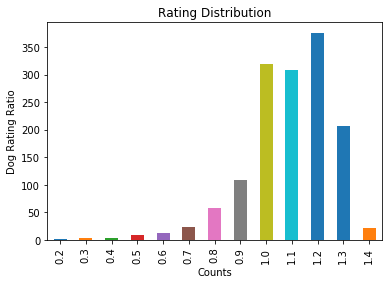

In [368]:
#plot rating disterbution

plt.title('Rating Distribution')
plt.xlabel('Counts')
plt.ylabel('Dog Rating Ratio')

df_tweets_master_clean.dog_rating_ratio.value_counts().sort_index().plot(kind='bar');


In [369]:
# getting the 20 Most Rated Dog Breeds counts
df_tweets_master_clean.groupby('dog_breed_prediction').count()['dog_rating_ratio'].sort_values().nlargest(20)


dog_breed_prediction
golden_retriever             135
Labrador_retriever           93 
Pembroke                     87 
Chihuahua                    78 
pug                          54 
chow                         40 
Pomeranian                   38 
Samoyed                      37 
toy_poodle                   37 
malamute                     29 
cocker_spaniel               27 
French_bulldog               25 
Chesapeake_Bay_retriever     23 
German_shepherd              20 
miniature_pinscher           20 
Siberian_husky               20 
Staffordshire_bullterrier    19 
Eskimo_dog                   18 
Shetland_sheepdog            18 
Maltese_dog                  18 
Name: dog_rating_ratio, dtype: int64

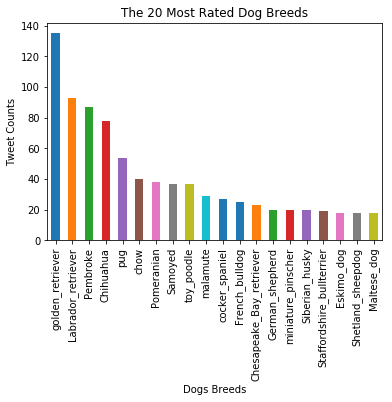

In [370]:
#plot The 20 Most Rated Dog Breeds
df_tweets_master_clean.groupby('dog_breed_prediction').count()['dog_rating_ratio'].sort_values().nlargest(20).plot(kind='bar');
plt.title('The 20 Most Rated Dog Breeds')
plt.xlabel('Dogs Breeds')
plt.ylabel('Tweet Counts');


In [371]:
# getting 20 largest average of favorite counts
df_tweets_master_clean.groupby('dog_breed_prediction').mean()['favorite_count'].sort_values().nlargest(20)


dog_breed_prediction
Saluki                     24060.000000
French_bulldog             18044.960000
Afghan_hound               17326.666667
giant_schnauzer            17314.500000
black-and-tan_coonhound    17012.000000
flat-coated_retriever      16791.625000
Irish_water_spaniel        16400.000000
standard_poodle            15786.000000
English_springer           15657.222222
Cardigan                   15311.000000
Leonberg                   14934.333333
basset                     13866.000000
Border_terrier             13578.000000
Lakeland_terrier           13213.200000
Bedlington_terrier         13025.000000
Great_Pyrenees             12890.307692
Mexican_hairless           12640.500000
Samoyed                    12588.864865
Norwegian_elkhound         12363.571429
golden_retriever           12336.762963
Name: favorite_count, dtype: float64

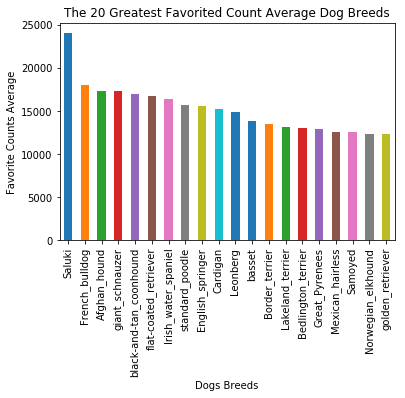

In [372]:
# plot 20 largest average of favorite counts
df_tweets_master_clean.groupby('dog_breed_prediction').mean()['favorite_count'].sort_values().nlargest(20).plot(kind='bar')
plt.title('The 20 Greatest Favorited Count Average Dog Breeds')
plt.xlabel('Dogs Breeds')
plt.ylabel('Favorite Counts Average');


In [373]:
# getting 20 largest average of retweet counts
df_tweets_master_clean.groupby('dog_breed_prediction').mean()['retweet_count'].sort_values().nlargest(20)


dog_breed_prediction
standard_poodle            6631.857143
Afghan_hound               5976.000000
English_springer           5973.555556
giant_schnauzer            5161.500000
Saluki                     5133.750000
Eskimo_dog                 4768.888889
French_bulldog             4752.680000
Lakeland_terrier           4701.533333
Great_Pyrenees             4664.307692
Cardigan                   4540.588235
flat-coated_retriever      4520.250000
Irish_water_spaniel        4500.666667
Samoyed                    4444.324324
Tibetan_mastiff            4193.000000
black-and-tan_coonhound    4164.500000
Labrador_retriever         3878.172043
Mexican_hairless           3865.250000
Leonberg                   3863.666667
cocker_spaniel             3724.481481
golden_retriever           3662.770370
Name: retweet_count, dtype: float64

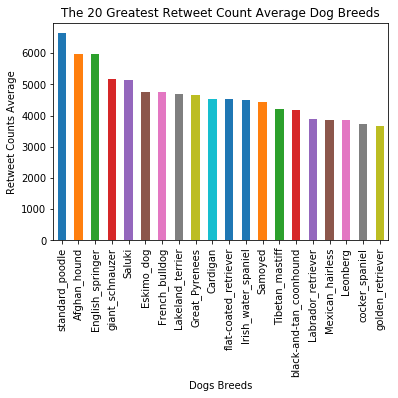

In [374]:
# plot 20 largest average of retweet counts
df_tweets_master_clean.groupby('dog_breed_prediction').mean()['retweet_count'].sort_values().nlargest(20).plot(kind='bar')
plt.title('The 20 Greatest Retweet Count Average Dog Breeds')
plt.xlabel('Dogs Breeds')
plt.ylabel('Retweet Counts Average');


### Resources

- https://stackoverflow.com/questions/29902714/print-very-long-string-completely-in-pandas-dataframe
- https://stackoverflow.com/questions/15340582/python-extract-pattern-matches
- https://stackoverflow.com/questions/13413590/how-to-drop-rows-of-pandas-dataframe-whose-value-in-certain-columns-is-nan
- https://stackoverflow.com/questions/12096252/use-a-list-of-values-to-select-rows-from-a-pandas-dataframe
- https://stackoverflow.com/questions/31511997/pandas-dataframe-replace-all-values-in-a-column-based-on-condition
- https://www.shanelynn.ie/using-pandas-dataframe-creating-editing-viewing-data-in-python/